<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    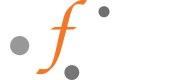
</div>

# Conflicts

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 25 min</li>
<li><strong>Exercises:</strong> 0 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>What do I do when my changes conflict with someone else’s?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Explain what conflicts are and when they can occur.</li>
<li>Resolve conflicts resulting from a merge.</li>
</ul>
</div>

As soon as people can work in parallel, they’ll likely step on each other’s toes. This will even happen with a single person: if we are working on a piece of software on both our laptop and a server in the lab, we could make different changes to each copy. Version control helps us manage these conflicts by giving us tools to resolve overlapping changes.

To see how we can resolve conflicts, we must first create one. The file `mars.txt` currently looks like this in both partners’ copies of our `planets` repository:
```bash
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
```

Let’s add a line to one partner’s copy only:
```bash
% nano mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
This line added to Wolfman's copy
```

and then push the change to GitHub:
```bash
% git add mars.txt
% git commit -m "Add a line in our home copy"
```
```brainfuck
[master 5ae9631] Add a line in our home copy
 1 file changed, 1 insertion(+)
```
```bash
% git push origin master
```
```brainfuck
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 352 bytes, done.
Total 3 (delta 1), reused 0 (delta 0)
To https://github.com/vlad/planets
   29aba7c..dabb4c8  master -> master
```

Now let’s have the other partner make a different change to their copy without updating from GitHub:
```bash
% nano mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
We added a different line in the other copy
```

We can commit the change locally:
```bash
% git add mars.txt
% git commit -m "Add a line in my copy"
```
```brainfuck
[master 07ebc69] Add a line in my copy
 1 file changed, 1 insertion(+)
 ```

but Git won’t let us push it to GitHub:
```bash
% git push origin master
```
```brainfuck
To https://github.com/vlad/planets.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://github.com/vlad/planets.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Merge the remote changes (e.g. 'git pull')
hint: before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```

![Conflict!](../images/conflict.svg)

Git detects that the changes made in one copy overlap with those made in the other and stops us from trampling on our previous work. What we have to do is pull the changes from GitHub, merge them into the copy we’re currently working in, and then push that. Let’s start by pulling:
```bash
% git pull origin master
```
```brainfuck
remote: Counting objects: 5, done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1)
Unpacking objects: 100% (3/3), done.
From https://github.com/vlad/planets
 * branch            master     -> FETCH_HEAD
Auto-merging mars.txt
CONFLICT (content): Merge conflict in mars.txt
Automatic merge failed; fix conflicts and then commit the result.
```

`git pull` tells us there’s a conflict, and marks that conflict in the affected file:
```bash
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
<<<<<<< HEAD
We added a different line in the other copy
=======
This line added to Wolfman's copy
>>>>>>> dabb4c8c450e8475aee9b14b4383acc99f42af1d
```

Our change is preceded by `<<<<<<< HEAD`. Git has then inserted `=======` as a separator between the conflicting changes and marked the end of the content downloaded from GitHub with `>>>>>>>`. (The string of letters and digits after that marker identifies the commit we’ve just downloaded.)

It is now up to us to edit this file to remove these markers and reconcile the changes. We can do anything we want: keep the change made in the local repository, keep the change made in the remote repository, write something new to replace both, or get rid of the change entirely. Let’s replace both so that the file looks like this:
```bash
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
We removed the conflict on this line
```

To finish merging, we add mars.txt to the changes being made by the merge and then commit:
```bash
% git add mars.txt
% git status
```
```brainfuck
On branch master
All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:

	modified:   mars.txt
```

```bash
% git commit -m "Merge changes from GitHub"
```
```brainfuck
[master 2abf2b1] Merge changes from GitHub
Now we can push our changes to GitHub:
```

```bash
% git push origin master
```
```brainfuck
Counting objects: 10, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 697 bytes, done.
Total 6 (delta 2), reused 0 (delta 0)
To https://github.com/vlad/planets.git
   dabb4c8..2abf2b1  master -> master
```

Git keeps track of what we’ve merged with what, so we don’t have to fix things by hand again when the collaborator who made the first change pulls again:
```bash
% git pull origin master
```
```brainfuck
remote: Counting objects: 10, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2)
Unpacking objects: 100% (6/6), done.
From https://github.com/vlad/planets
 * branch            master     -> FETCH_HEAD
Updating dabb4c8..2abf2b1
Fast-forward
 mars.txt | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
 ```

We get the merged file:
```bash
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
We removed the conflict on this line
```
We don’t need to merge again because Git knows someone has already done that.

We don’t need to merge again because Git knows someone has already done that.

Git’s ability to resolve conflicts is very useful, but conflict resolution costs time and effort, and can introduce errors if conflicts are not resolved correctly. If you find yourself resolving a lot of conflicts in a project, consider these technical approaches to reducing them:

- Pull from upstream more frequently, especially before starting new work
- Use topic branches to segregate work, merging to master when complete
- Make smaller more atomic commits
- Where logically appropriate, break large files into smaller ones so that it is less likely that two authors will alter the same file simultaneously

Conflicts can also be minimized with project management strategies:

- Clarify who is responsible for what areas with your collaborators
- Discuss what order tasks should be carried out in with your collaborators so that tasks expected to change the same lines won’t be worked on simultaneously
- If the conflicts are stylistic churn (e.g. tabs vs. spaces), establish a project convention that is governing and use code style tools (e.g. `htmltidy`, `perltidy`, `rubocop`, etc.) to enforce, if necessary

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-Points%3A%0A"><i class="fa fa-key"></i> Key Points:
</h3>
    <ul>
<li>Conflicts occur when two or more people change the same file(s) at the same time.</li>
<li>The version control system does not allow people to overwrite each other’s changes blindly, but highlights conflicts so that they can be resolved.</li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./09_episode.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./11_episode.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>